Comparison of different c2l models for NanostringWTA data:

In [1]:
import sys,os
import pickle
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from IPython.display import Image
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'
import pycell2location
import cell2location
from pycell2location import models

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda: Tesla V100-SXM2-32GB (0000:89:00.0)


Load data and subset to one 19pcw replicate:

In [2]:
adata_wta = pickle.load(open('/nfs/team283/aa16/KR_NAS/data/nanostringWTA_fetailBrain_AnnData.p', 'rb'))
adata_wta = adata_wta[adata_wta.obs['slide'] == '00MU',:]

In [3]:
meanExpression_sc = pd.read_csv("/nfs/team283/aa16/KR_NAS/data/polioudakis2019_meanExpressionProfiles.csv", index_col=0)

In [4]:
counts_negativeProbes = np.asarray(adata_wta[:,np.array(adata_wta.var_names =='NegProbe-WTX').squeeze()].X)
counts_nuclei = np.asarray(adata_wta.obs['nuclei']).reshape(len(adata_wta.obs['nuclei']),1)
adata_wta = adata_wta[:,np.array(adata_wta.var_names != 'NegProbe-WTX').squeeze()]

In [7]:
adata_wta.raw = adata_wta

In [8]:
cell2location.run_c2l.run_cell2location(meanExpression_sc, adata_wta, 
        model_name=pycell2location.models.LocationModelLinearDependentWMultiExperimentLocationBackgroundNormGeneAlpha,
        train_args={'use_raw': False},
        model_kwargs={
        "cell_number_prior" : {'cells_per_spot': counts_nuclei, 'factors_per_spot': 6, 'combs_per_spot': 3},
        "cell_number_var_prior" : {'cells_mean_var_ratio': 1, 'factors_mean_var_ratio': 1, 'combs_mean_var_ratio': 1}})

### Summarising single cell clusters ###
### Creating model ### - time 0.0 min
### Analysis name: LocationModelLinearDependentWMultiExperimentLocationBackgroundNormGeneAlpha_1experiments_16clusters_76locations_15124genes
### Training model ###


Average Loss = 4.5654e+06: 100%|██████████| 20000/20000 [01:21<00:00, 244.13it/s]
Finished [100%]: Average Loss = 4.5654e+06


Average Loss = 4.5655e+06: 100%|██████████| 20000/20000 [01:21<00:00, 244.58it/s]
Finished [100%]: Average Loss = 4.5655e+06


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

/nfs/team283/aa16/software/miniconda3/envs/c2l/lib/python3.7/site-packages/cell2location-0.5-py3.7.egg/cell2location/models/base/pymc3_model.py:449: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nrow, ncol, i + 1)
/nfs/team283/aa16/software/miniconda3/envs/c2l/lib/python3.7/site-packages/cell2location-0.5-py3.7.egg/cell2location/models/base/pymc3_model.py:450: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(np.ceil(n_plots / ncol), ncol, i + 1)


### Sampling posterior ### - time 5.75 min


  0%|          | 0/24 [00:00<?, ?it/s]

... storing 'panel' as categorical
... storing 'construct' as categorical
... storing 'instrument_type' as categorical
... storing 'read_pattern' as categorical
... storing 'ngs_prep' as categorical
... storing 'pcr_primer_plate' as categorical
... storing 'segment_type' as categorical
... storing 'segment' as categorical
... storing 'aoi' as categorical
... storing 'dsp_date' as categorical
... storing 'slide' as categorical
... storing 'human_sample_ID' as categorical
... storing 'slide_barcode' as categorical
... storing 'age' as categorical
... storing 'source_ID' as categorical
... storing 'AOI_type' as categorical
... storing 'Region' as categorical
... storing 'Plate' as categorical
... storing 'sample' as categorical


### Saving results ###
### Ploting results ###
### Plotting posterior of W / cell locations ###
Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 KeyError('coords')
### Done ### - time 6.14 min


{'sc_obs':                       End     ExDp1     ExDp2       ExM     ExM-U       ExN  \
 TSPAN6           0.088608  0.016184  0.000000  0.048768  0.026196  0.036418   
 DPM1             0.059072  0.130456  0.078313  0.100489  0.101936  0.079940   
 SCYL3            0.012658  0.022070  0.030120  0.021890  0.029043  0.014707   
 C1orf112         0.000000  0.009809  0.012048  0.006516  0.009112  0.005103   
 FGR              0.016878  0.000490  0.000000  0.000000  0.000000  0.000000   
 ...                   ...       ...       ...       ...       ...       ...   
 ENSG00000276144  0.000000  0.000000  0.000000  0.000102  0.000569  0.000100   
 SNORD114-7       0.000000  0.000000  0.006024  0.000000  0.000000  0.000000   
 ZNF965P          0.000000  0.000000  0.000000  0.000102  0.000000  0.000100   
 GOLGA8K          0.000000  0.000981  0.000000  0.000102  0.000000  0.000000   
 GOLGA8J          0.000000  0.000000  0.000000  0.000000  0.000000  0.000200   
 
                     InCGE  

In [2]:
adata_c2l = sc.read_h5ad('resultsLocationModelLinearDependentWMultiExperimentLocationBackgroundNormGeneAlpha_1experiments_16clusters_76locations_15124genes/sp.h5ad')

In [18]:
colourCode = {'SPN': 'salmon', 'End': 'darkcyan', 'ExDp1': 'deepskyblue', 'ExDp2': 'blue', 'ExM': 'gold', 'ExM-U': 'yellow',
              'ExN': 'darkorange', 'InCGE': 'darkgrey', 'InMGE': 'dimgray', 'IP': 'darkviolet',
              'Mic': 'indianred', 'OPC': 'lightcoral', 'oRG': 'red', 'Per': 'darkgreen',
              'PgG2M': 'rebeccapurple', 'PgS': 'violet', 'vRG': 'lightgreen'}

In [4]:
def plot_absolute_abundances_1D(adata_sp, subset = None, saving = False,
                               scaling = 0.15, power = 1, pws = [0,0,100,500,1000,3000,6000],
                               dimName = 'VCDepth', xlab = 'Cortical Depth', colourCode = None): 
    
    SMALL_SIZE = 18
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 18

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    celltypes = [x.split('mean_spot_factors')[-1] for x in adata_c2l.obs.columns if len(x.split('mean_spot_factors')) == 2 ]
    abundances = adata_c2l.obs.loc[:,[len(x.split('mean_spot_factors')) == 2 for x in adata_c2l.obs.columns]]
    
    if subset:
        celltypesForPlot = np.repeat(celltypes,sum(subset))
        vcForPlot = np.array([adata_sp.obs[dimName].loc[subset] for j in range(len(celltypes))]).flatten()
        countsForPlot = np.array([abundances.iloc[:,j].loc[subset] for j in range(len(celltypes))]) 
    else:
        celltypesForPlot = np.repeat(celltypes,np.shape(adata_c2l)[0])
        vcForPlot = np.array([adata_sp.obs[dimName] for j in range(len(celltypes))]).flatten()
        countsForPlot = np.array([abundances.iloc[:,j] for j in range(len(celltypes))]) 
    
    if type(colourCode) is dict:
        colourCode = pd.DataFrame(data = colourCode.values(), index = colourCode.keys(), columns = ['Colours'])
    else:
        colourCode = pd.DataFrame(data = 'black', index = celltypes, columns = ['Colours'])
    
    coloursForPlot = np.array(colourCode.loc[np.array((celltypesForPlot)),'Colours'])
    
    plt.figure(figsize = (12,8))
    plt.scatter(vcForPlot, celltypesForPlot, s=((1-np.amin(countsForPlot*scaling) + countsForPlot*scaling))**power,
                c= coloursForPlot)

    plt.xlabel(xlab)

    # make a legend:
    for pw in pws:
        plt.scatter([], [], s=((1-np.amin(countsForPlot*scaling) + pw*scaling))**power, c="black",label=str(pw))

    h, l = plt.gca().get_legend_handles_labels()
    lgd = plt.legend(h[1:], l[1:], labelspacing=1.2, title="Total Number", borderpad=1, 
                frameon=True, framealpha=0.6, edgecolor="k", facecolor="w", bbox_to_anchor=(1.55, 0.5))
    plt.tight_layout()
    
    if saving:
        plt.savefig(saving)

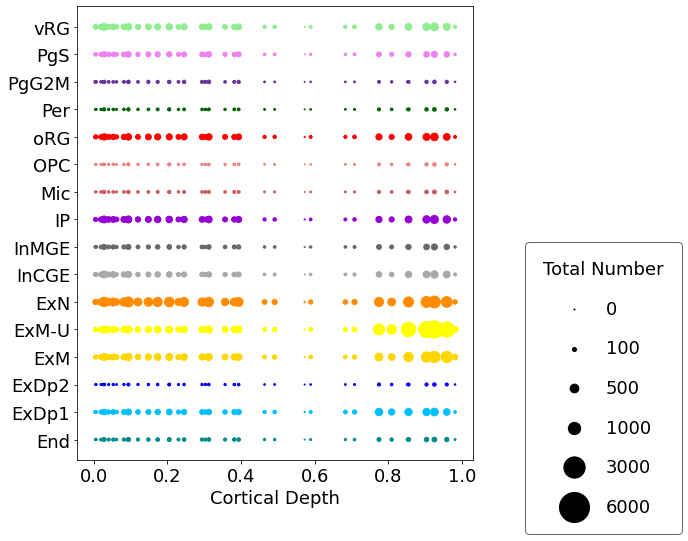

In [5]:
plot_absolute_abundances_1D(adata_c2l, subset = None, saving = False,
                               scaling = 0.15, power = 1, pws = [0,0,100,500,1000,3000,6000],
                               dimName = 'VCDepth', xlab = 'Cortical Depth', colourCode = colourCode)

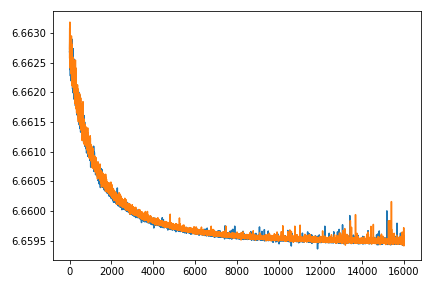

In [132]:
from IPython.display import Image
Image(filename='resultsLocationModelLinearDependentWMultiExperimentLocationBackgroundNormGeneAlpha_1experiments_16clusters_76locations_15124genes/plots/training_history_without_first_20perc.png',
      width=400)

In [30]:
def plot_density_1D(adata_sp, subset = None, saving = False,
                               scaling = 0.15, power = 1, pws = [0,0,100,500,1000,3000,6000,10000],
                               dimName = 'VCDepth', areaName = 'AOISurfaceArea', xlab = 'Cortical Depth', colourCode = None): 
    r""" Plot density of celltypes in a dotplot across 1 dimension

    :param adata_sp: anndata object for spatial data with celltype abundance included in .obs (this is returned by running cell2location first)
    :param subset: optionally a boolean for only using part of the data in adata_sp
    :param saving: optionally a string value, which will result in the plot to be saved under this name
    :param scaling: how dot size should scale linearly with abundance values, default 0.15
    :param power: how dot size should scale non-linearly with abundance values, default 1 (no non-linear scaling)
    :param pws: which abundance values to show in the legend
    :param dimName: the name of the column in adata_sp.obs that contains the dimension used for plotting
    :param areaName: the name of the column in adata_sp.obs that contain the area of each ROI (assumed to be square micrometer)
    :param xlab: the x-axis label for the plot
    :param colourCode: optionally a dictionary mapping cell type names to colours
    """ 
    
    SMALL_SIZE = 18
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 18

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    roi_area = np.array(adata_sp.obs[areaName])
    celltypes = [x.split('mean_spot_factors')[-1] for x in adata_sp.obs.columns if len(x.split('mean_spot_factors')) == 2 ]
    abundances = adata_sp.obs.loc[:,[len(x.split('mean_spot_factors')) == 2 for x in adata_sp.obs.columns]]
    
    if subset:
        celltypesForPlot = np.repeat(celltypes,sum(subset))
        vcForPlot = np.array([adata_sp.obs[dimName].loc[subset] for j in range(len(celltypes))]).flatten()
        countsForPlot = np.array([abundances.iloc[:,j].loc[subset]/roi_area[subset]*10**6 for j in range(len(celltypes))]) 
    else:
        celltypesForPlot = np.repeat(celltypes,np.shape(adata_sp)[0])
        vcForPlot = np.array([adata_sp.obs[dimName] for j in range(len(celltypes))]).flatten()
        countsForPlot = np.array([abundances.iloc[:,j]/roi_area*10**6 for j in range(len(celltypes))]) 
    
    if type(colourCode) is dict:
        colourCode = pd.DataFrame(data = colourCode.values(), index = colourCode.keys(), columns = ['Colours'])
    else:
        colourCode = pd.DataFrame(data = 'black', index = celltypes, columns = ['Colours'])
    
    coloursForPlot = np.array(colourCode.loc[np.array((celltypesForPlot)),'Colours'])
    
    plt.figure(figsize = (12,8))
    plt.scatter(vcForPlot, celltypesForPlot, s=((1-np.amin(countsForPlot*scaling) + countsForPlot*scaling))**power,
                c= coloursForPlot)

    plt.xlabel(xlab)

    # make a legend:
    for pw in pws:
        plt.scatter([], [], s=((1-np.amin(countsForPlot*scaling) + pw*scaling))**power, c="black",label=str(pw))

    h, l = plt.gca().get_legend_handles_labels()
    lgd = plt.legend(h[1:], l[1:], labelspacing=1.2, title="Density ($cells/mm^2$)", borderpad=1, 
                frameon=True, framealpha=0.6, edgecolor="k", facecolor="w", bbox_to_anchor=(1, 0.9))
    plt.tight_layout()
    
    if saving:
        plt.savefig(saving)

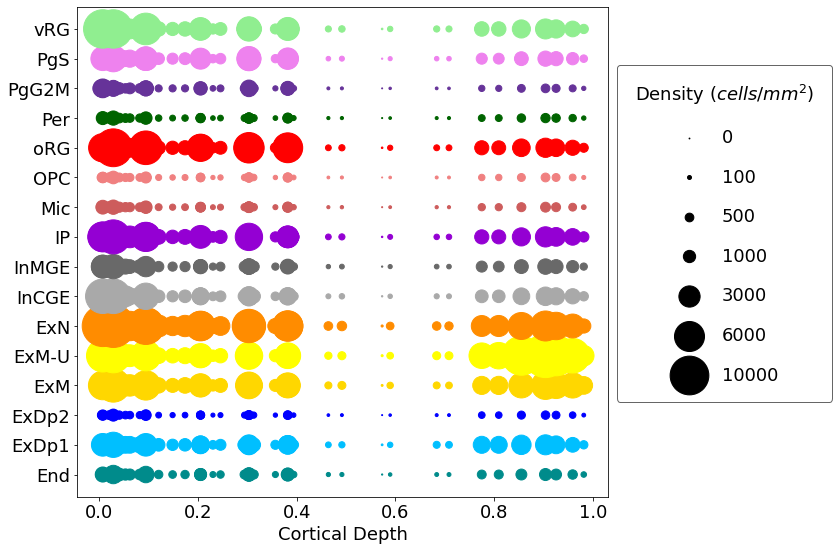

In [31]:
plot_density_1D(adata_c2l, subset = None, saving = False,
                               scaling = 0.15, power = 1, pws = [0,0,100,500,1000,3000,6000,10000],
                               dimName = 'VCDepth', areaName = 'roi_dimension', xlab = 'Cortical Depth',
                colourCode = colourCode)